# Seaborn

# 6.2 APIの概要

Text(0, 0.5, 'tip')

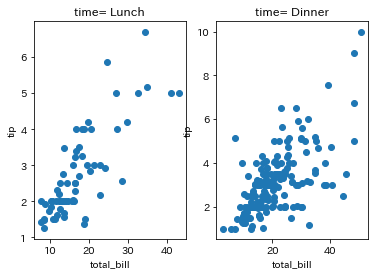

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')

fig, axes = plt.subplots(1,2)
axes[0].scatter(tips.loc[tips['time']=='Lunch', 'total_bill'],
              tips.loc[tips['time']=='Lunch', 'tip'])
axes[1].scatter(tips.loc[tips['time']=='Dinner', 'total_bill'],
              tips.loc[tips['time']=='Dinner', 'tip'])

axes[0].set_title('time= Lunch')
axes[0].set_xlabel('total_bill')
axes[0].set_ylabel('tip')
axes[1].set_title('time= Dinner')
axes[1].set_xlabel('total_bill')
axes[1].set_ylabel('tip')

### axes-levelの関数でグラフを描画する

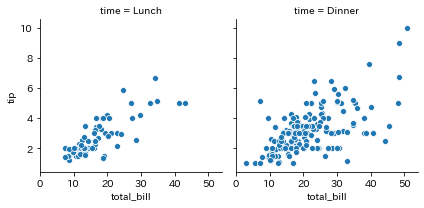

In [8]:
facet_grid = sns.FacetGrid(tips, col='time')
facet_grid.map(sns.scatterplot, 'total_bill', 'tip')

### figure-levelの関数でグラフを描画する

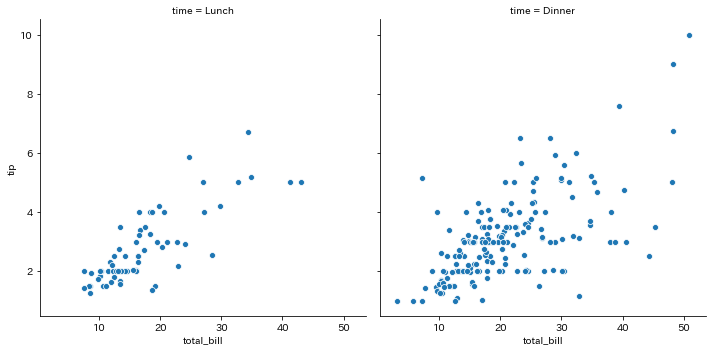

In [9]:
sns.relplot(data=tips, x='total_bill', y='tip', col='time')

# 6.3 グラフの描画方法

In [2]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 単一のグラフを描画する(サブプロットオブジェクト)

#### 散布図の描画

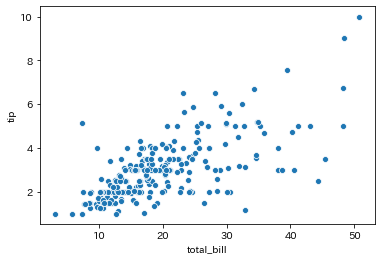

In [11]:
sns.scatterplot(data=tips, x='total_bill', y='tip');

#### Matplotlibのサブプロットとして描画

Text(0.5, 1.0, 'size and tips')

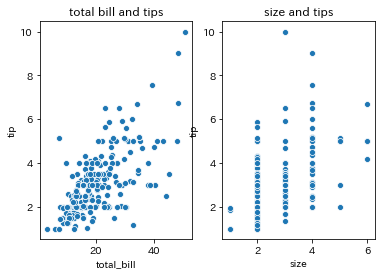

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0])
sns.scatterplot(data=tips, x='size', y='tip', ax=axes[1])
axes[0].set_title('total bill and tips')
axes[1].set_title('size and tips')

### 複数の種類のグラフを組み合わせる(JointGridオブジェクト)

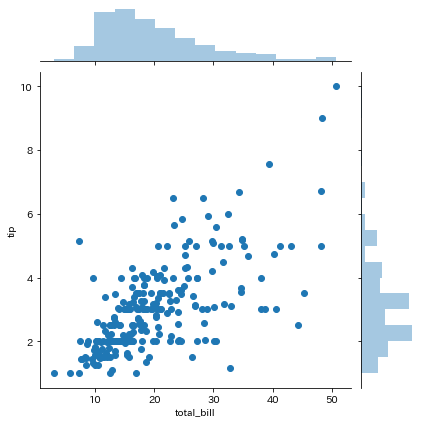

In [17]:
sns.jointplot(data=tips, x='total_bill', y='tip');

### データを分類してサブプロットごとに描画する(FaceGridオブジェクト)

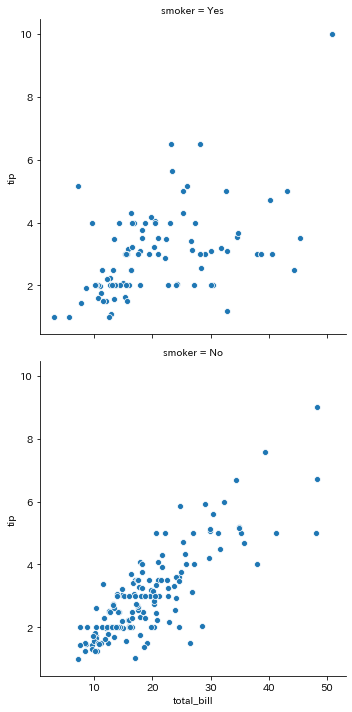

In [18]:
sns.relplot(data=tips, x='total_bill', y='tip', row='smoker')

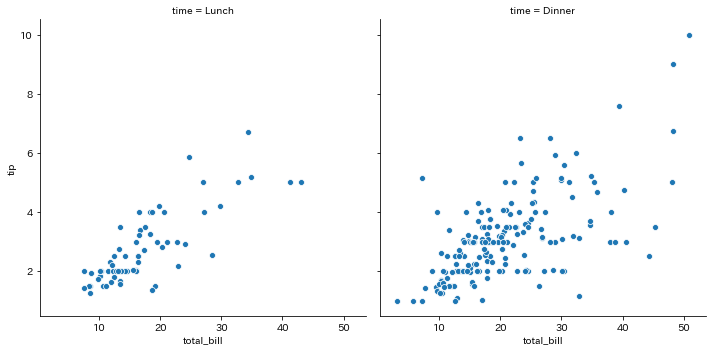

In [19]:
sns.relplot(data=tips, x='total_bill', y='tip', col='time')

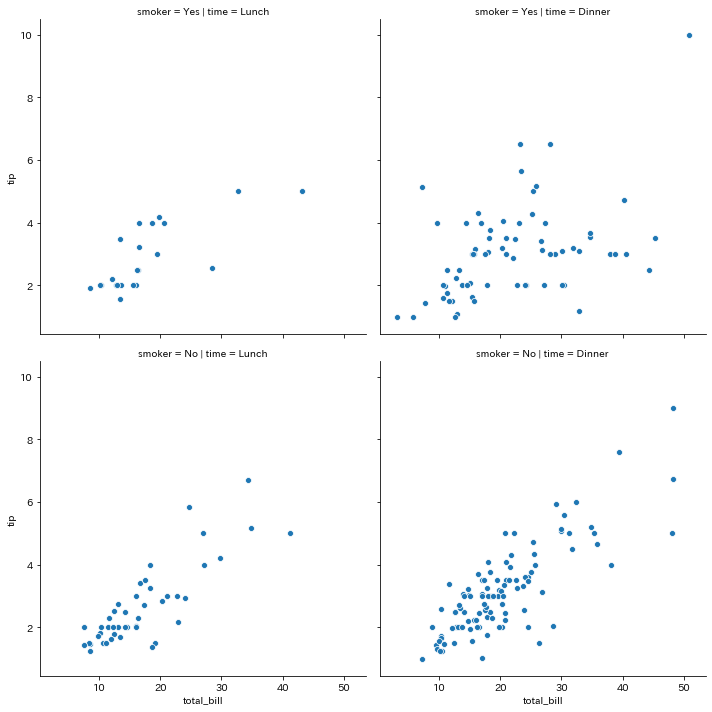

In [20]:
sns.relplot(data=tips, x='total_bill', y='tip', row='smoker', col='time')

### データを組み合わせてサブプロットごとに描画する(PairGridオブジェクト）

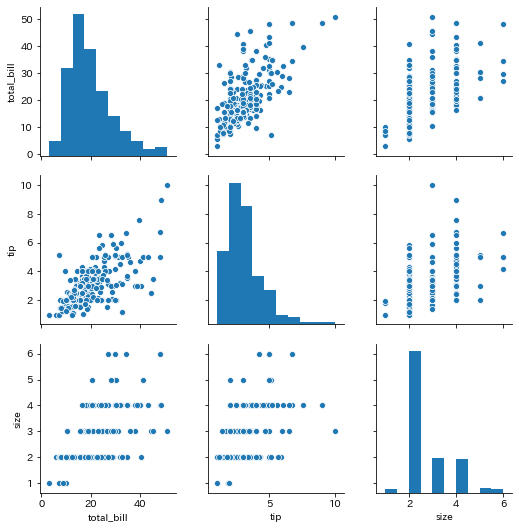

In [21]:
sns.pairplot(data=tips, vars=['total_bill', 'tip', 'size'])

### 整然データ

In [23]:
# 雑然データの作成
import pandas as pd

wide_df = pd.DataFrame([
    ['Tokyo', 5.8, 5.7, 5.6],
    ['Osaka', 6.8, 6.7, 6.6],
    ['Nagoya', 5.1, 5.1, 5.0]],
    columns=['Location', '2020-01-01', '2020-01-02', '2020-01-03']
)
wide_df

,Location,2020-01-01,2020-01-02,2020-01-03
0,Tokyo,5.8,5.7,5.6
1,Osaka,6.8,6.7,6.6
2,Nagoya,5.1,5.1,5.0


In [25]:
# meltを使って整然データに変更
tidy_df = wide_df.melt(id_vars='Location', var_name='Date', value_name='Temperature')
tidy_df

,Location,Date,Temperature
0,Tokyo,2020-01-01,5.8
1,Osaka,2020-01-01,6.8
2,Nagoya,2020-01-01,5.1
3,Tokyo,2020-01-02,5.7
4,Osaka,2020-01-02,6.7
5,Nagoya,2020-01-02,5.1
6,Tokyo,2020-01-03,5.6
7,Osaka,2020-01-03,6.6
8,Nagoya,2020-01-03,5.0


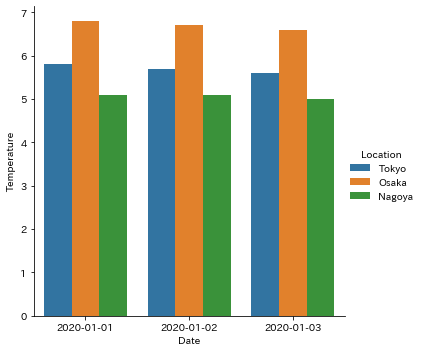

In [26]:
sns.catplot(data=tidy_df, x='Date', y='Temperature', kind='bar', hue='Location')

# 6.4 データの関係の可視化

### 散布図を描画する

In [4]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


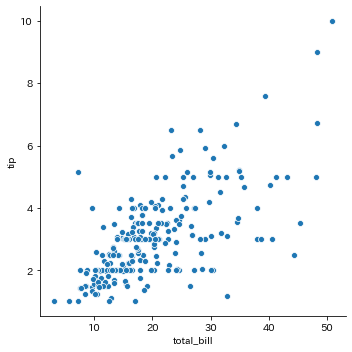

In [5]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter')

### 要素を分解して可視化する

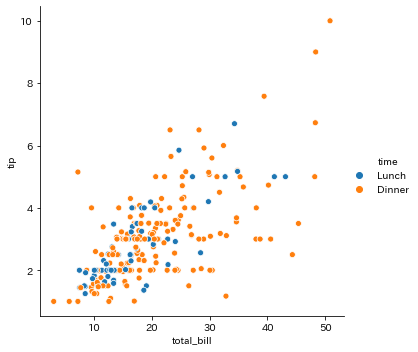

In [7]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='time')

#### 要素ごとに異なるマーカーで描画

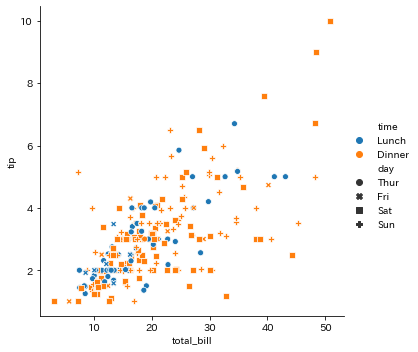

In [8]:
# 引数styleを用いると要素ごとに異なるマーカで描画される
sns.relplot(data=tips, x='total_bill', y='tip', hue='time', style='day')

#### 要素の値を色で表現

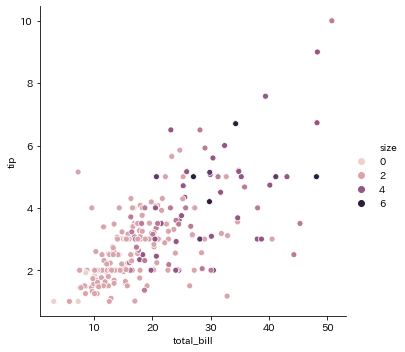

In [9]:
# 引数hueに連続データが渡された場合、要素が色の濃淡で表現される
sns.relplot(data=tips, x='total_bill', y='tip', hue='size')

#### 要素の値を大きさで表現

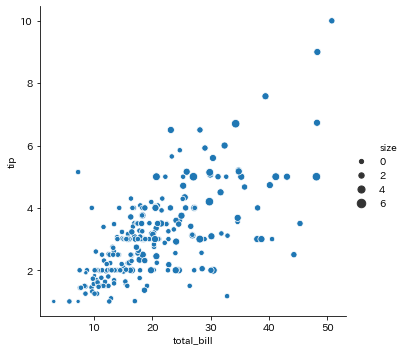

In [10]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

### 折れ線グラフを描画する

In [11]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


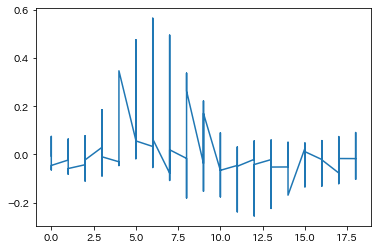

In [12]:
# matplotlibで折れ線を描く
import matplotlib.pyplot as plt

sorted_fmri = fmri.sort_values('timepoint')
fig, ax = plt.subplots()
ax.plot(sorted_fmri['timepoint'], sorted_fmri['signal'])

#### relplot関数で描画

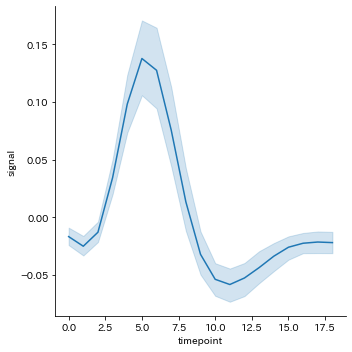

In [20]:
#　同一のX値のデータがある場合は平均化される
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line')

#### 塗りつぶし色の描画方法を変更

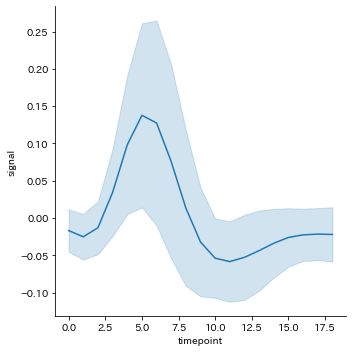

In [22]:
# 引数ciに次の値を渡すと塗りつぶし色の描画方法を変更できる
# 0-100までのint型:指定したパーセント値の信頼区間
# 'sd':標準偏差
# None:非表示
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', ci='sd')

#### データの集計を行わない場合

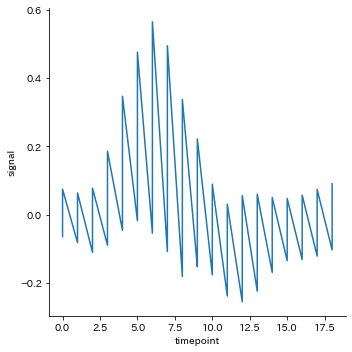

In [23]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', estimator=None)

#### 複数の折れ線グラフ

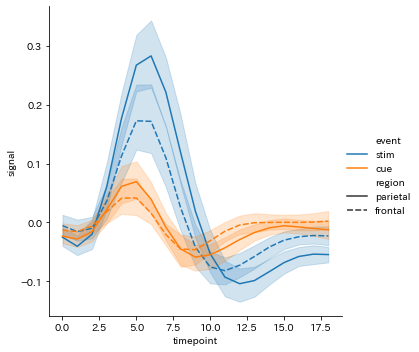

In [24]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='event', style='region')

### ファセットを利用する

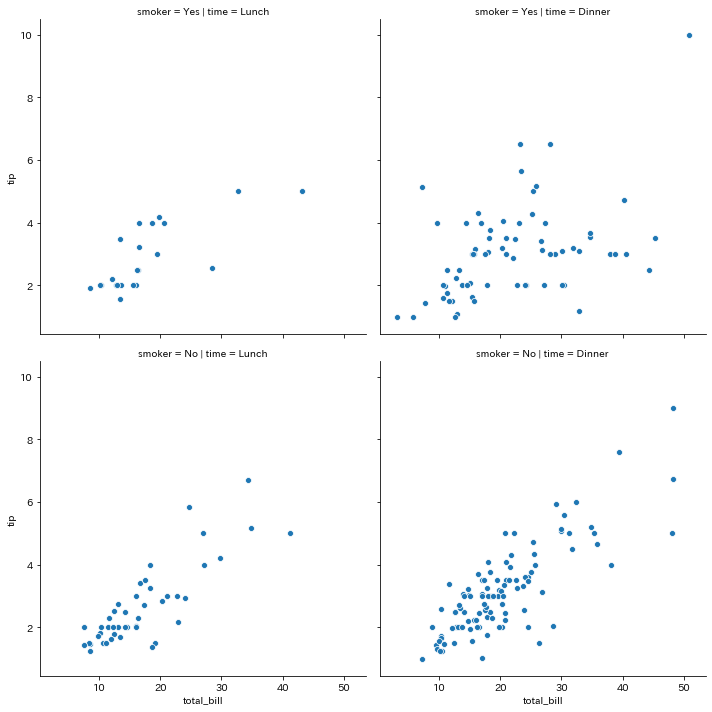

In [25]:
sns.relplot(data=tips, x='total_bill', y='tip', col='time', row='smoker')

#### 折れ線グラフの描画

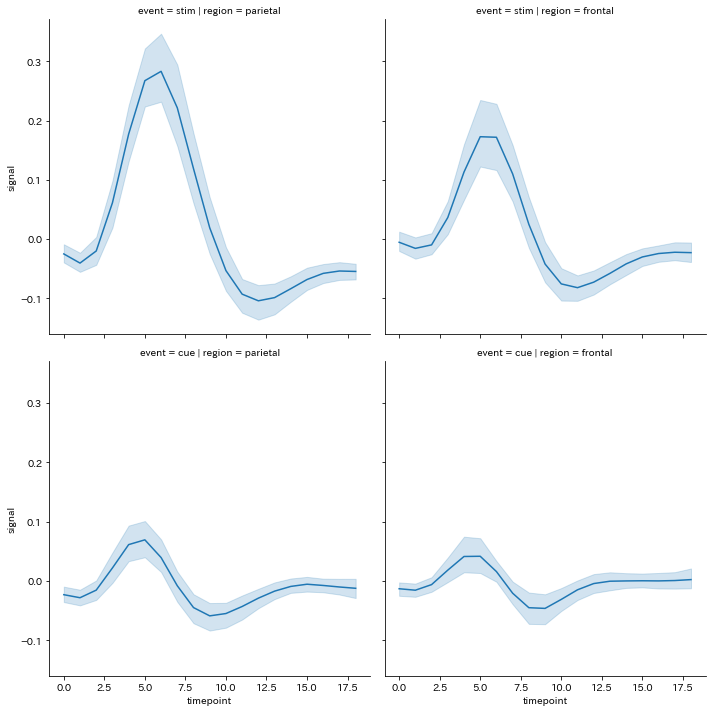

In [26]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', row='event', col='region')

# 6.5 カテゴリデータの可視化

### ストリッププロットを描画する

In [27]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


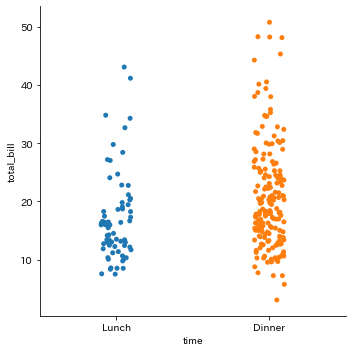

In [28]:
sns.catplot(data=tips, x='time', y='total_bill', kind='strip')

#### ストリッププロットを色分けして横に描画

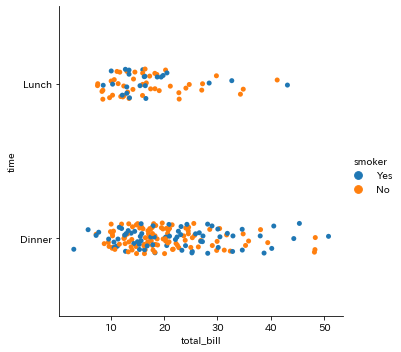

In [29]:
# 横にするにはX値とY値を入れ替える
# 引数hueで色分けを実施
sns.catplot(data=tips, x='total_bill', y='time', hue='smoker')

#### ジッタの幅を調整

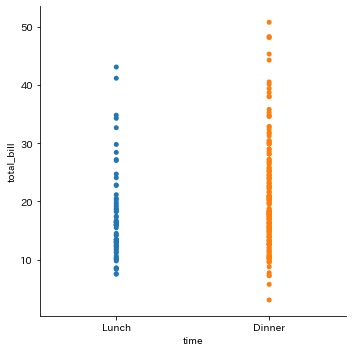

In [30]:
# 引数jitterに0から1のfloat値を渡すとジッタ幅を調整できる
sns.catplot(data=tips, x='time', y='total_bill', jitter=0)

### ビースウォームプロットを描画する

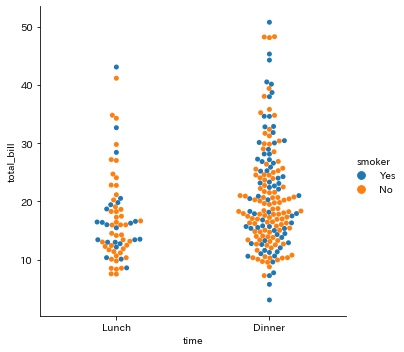

In [31]:
sns.catplot(data=tips, x='time', y='total_bill', hue='smoker', kind='swarm')

### 箱ひげ図を描画する

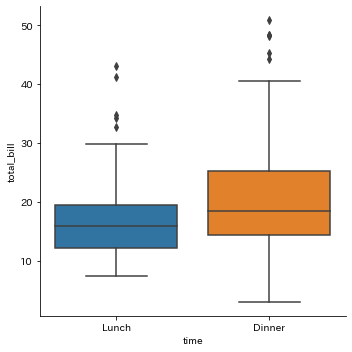

In [32]:
sns.catplot(data=tips, x='time', y='total_bill', kind='box')

#### サブカテゴリで並べて描画

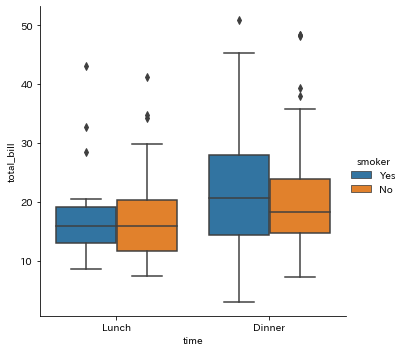

In [33]:
sns.catplot(data=tips, x='time', y='total_bill', hue='smoker', kind='box')

#### 分位数を増やした箱ひげ図

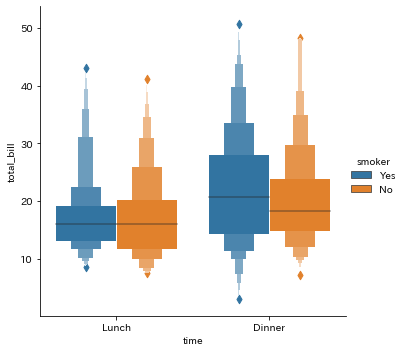

In [34]:
# 引数kindにboxtenを渡すとより分位数を増やした箱ひげ図を描画できます
sns.catplot(data=tips, x='time', y='total_bill', kind='boxen', hue='smoker')

### バイオリン図を描画する

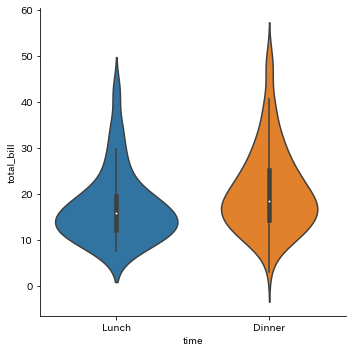

In [35]:
sns.catplot(data=tips, x='time', y='total_bill', kind='violin')

#### 左右で分割して描画

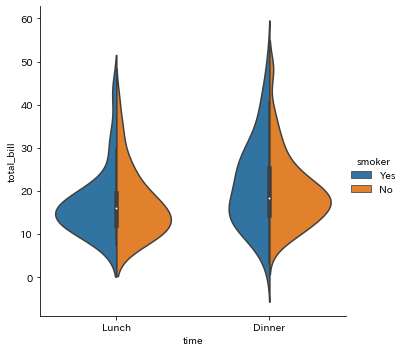

In [36]:
# 引数hueに分割する列名、引数splitにTrue
sns.catplot(data=tips, x='time', y='total_bill', kind='violin', hue='smoker', split=True)

### 棒グラフを描画する

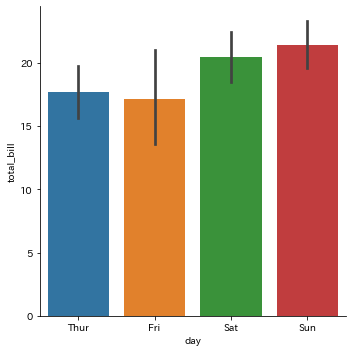

In [37]:
# デフォルトでは平均値を棒グラフ、信頼区間をエラーバーで表示
sns.catplot(data=tips, x='day', y='total_bill', kind='bar')

#### 中央値で集計

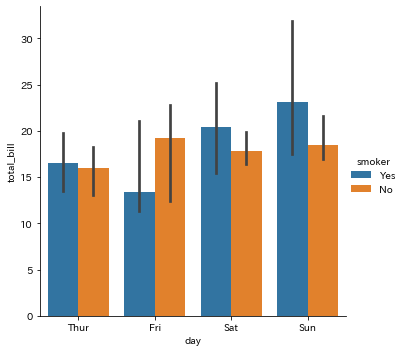

In [38]:
import numpy as np
sns.catplot(data=tips, x='day', y='total_bill', kind='bar', hue='smoker', estimator=np.median)

#### データの個数を棒グラフに描画

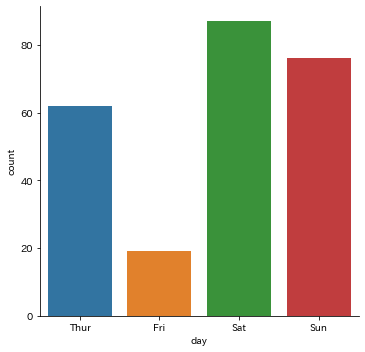

In [40]:
# 引数kindにcountをするとデータの個数をグラフに出来る
sns.catplot(data=tips, x='day', kind='count')

### ポイントプロットを描画する

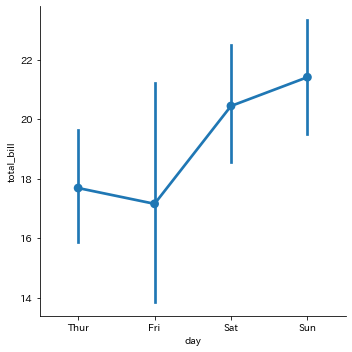

In [43]:
sns.catplot(data=tips, x='day', y='total_bill', kind='point')

#### 推定値を中央値にして描画

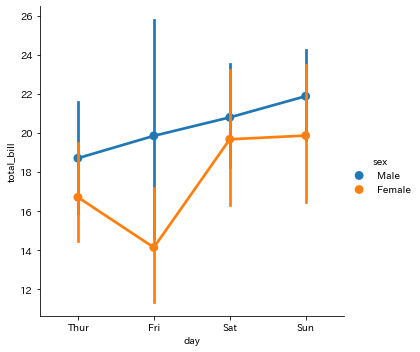

In [44]:
sns.catplot(data=tips, x='day', y='total_bill', kind='point', estimatpr='median', hue='sex')

### ファセットを利用する

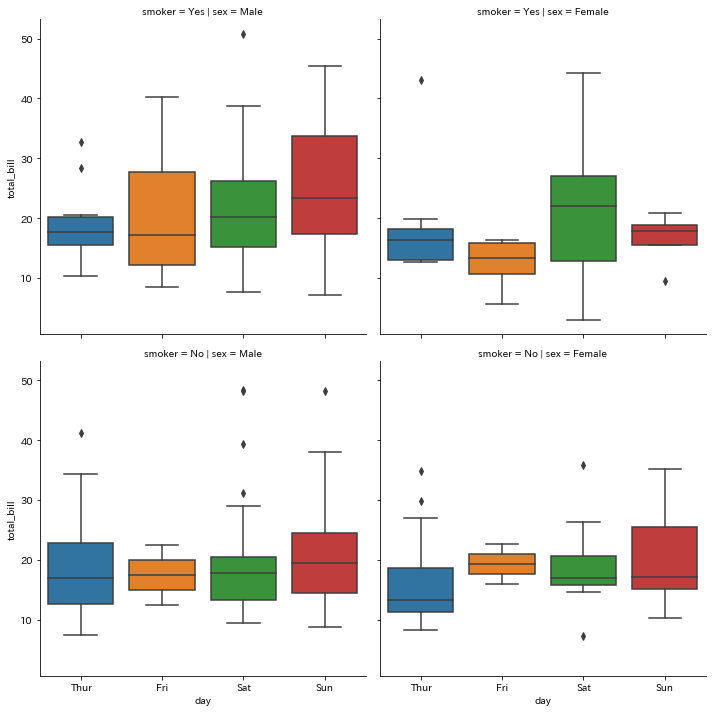

In [45]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box', row='smoker', col='sex')

# 6.6 データ分布の可視化

### distplot()関数を利用する

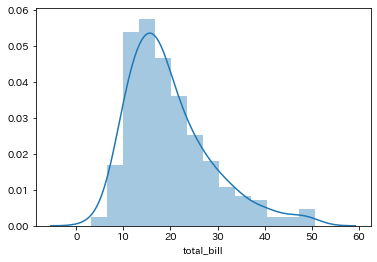

In [46]:
# デフィルトではヒストグラムとカーネル密度推定グラフが描画される
sns.distplot(tips['total_bill'])

#### 描画するグラフを指定

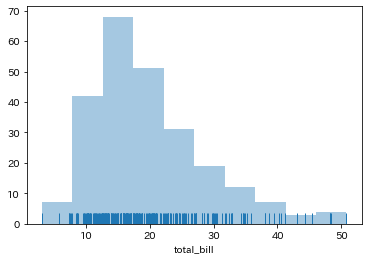

In [47]:
# 引数で描画するグラフを選択出来る
# hist:ヒストグラム
# kde:カーネル密度グラフ
# rug:ラグプロット
sns.distplot(tips['total_bill'], hist=True, kde=False, rug=True, bins=10)

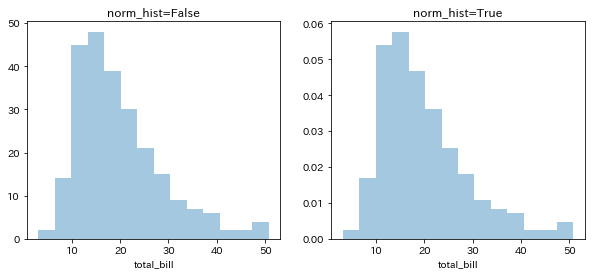

In [58]:
# kde=Trueの場合は相対度数のヒストグラム
# kde=Falseの場合は度数のヒストグラム
# ヒストグラムを明示的に相対度数にするにはnorm_hist=True

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].set_title('norm_hist=False')
axes[1].set_title('norm_hist=True')
sns.distplot(tips['total_bill'], kde=False, ax=axes[0])
sns.distplot(tips['total_bill'], kde=False, norm_hist=True, ax=axes[1])

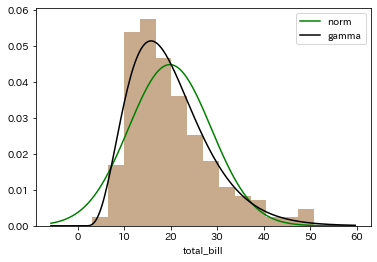

In [60]:
# 引数fitにpdfメソッドをもつオブジェクトを渡すと任意の分布を適合できる
from scipy import stats

fig, ax = plt.subplots()
sns.distplot(tips['total_bill'],
            kde=False,
            fit=stats.norm, # 正規分布
            fit_kws={'label': 'norm', 'color':'g'}, # 線のラベルと書式
            ax=ax)

sns.distplot(tips['total_bill'],
            kde=False,
            fit=stats.gamma, # ガンマ分布
            fit_kws={'label': 'gamma', 'color':'k'}, # 線のラベルと書式
            ax=ax)
ax.legend()

### 2変数の分布を可視化する

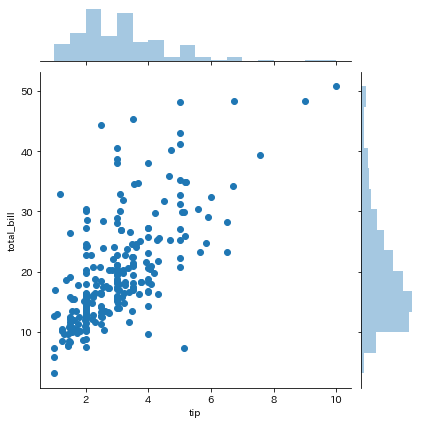

In [61]:
sns.jointplot(data=tips, x='tip', y='total_bill')

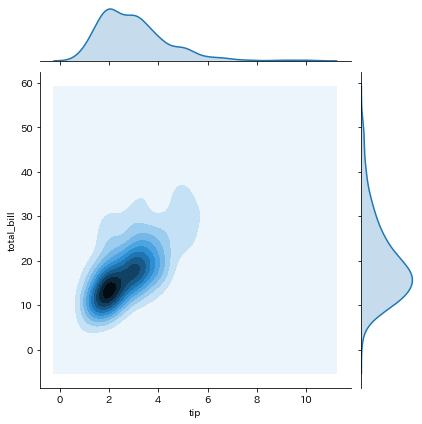

In [62]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='kde')

# 6.7 回帰の可視化

### lmplot()関数を利用する

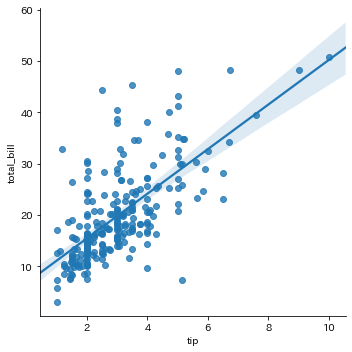

In [63]:
sns.lmplot(data=tips, x='tip', y='total_bill')

#### データを分類して描画

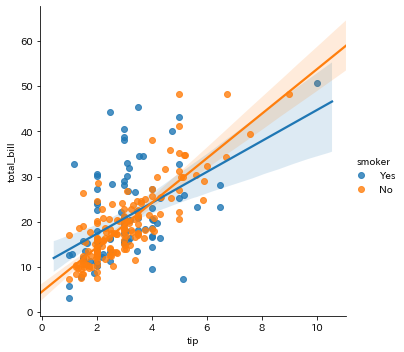

In [65]:
sns.lmplot(data=tips, x='tip', y='total_bill', hue='smoker')

#### 信頼区間の変更

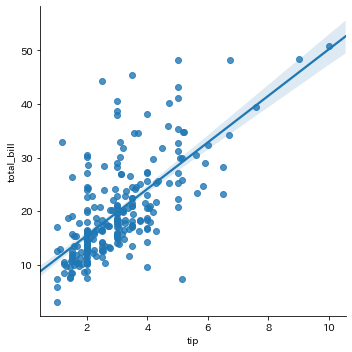

In [66]:
# 引数ciに0から100までのint型を渡すと信頼区間を変更できる
sns.lmplot(data=tips, x='tip', y='total_bill', ci=80)

#### 多項式による回帰

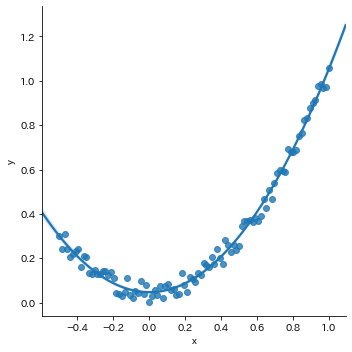

In [68]:
# 引数orderに次数を渡すと多項式による回帰

import pandas as pd
squared_x = np.linspace(-0.5, 1, 100)
# xを2乗し、一様ライン数を加算
squared_y = squared_x **2 + np.random.rand(100) * 0.1
data = pd.DataFrame({'x':squared_x, 'y': squared_y})
sns.lmplot(data=data, x='x', y='y', order=2)

#### ロバスト回帰モデルの利用

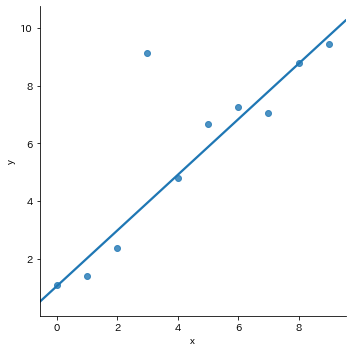

In [69]:
# 引数robustにTrueを渡すとロバスト回帰モデルを用いる
liner_x = np.arange(10)
liner_y = liner_x + np.random.rand(10) * 2
liner_y[3] = liner_y[3] + 5 # 外れ値を作成
data = pd.DataFrame({'x': liner_x, 'y': liner_y})
sns.lmplot(data=data, x='x', y='y', ci=None, robust=True)

### ファセットを利用する

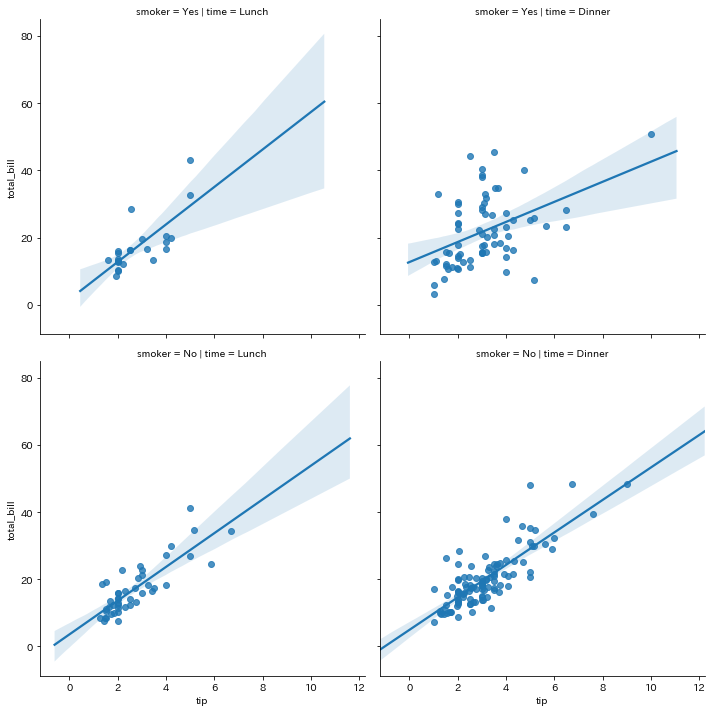

In [70]:
sns.lmplot(data=tips, x='tip', y='total_bill', row='smoker', col='time')

### 回帰とデータ分布を可視化する

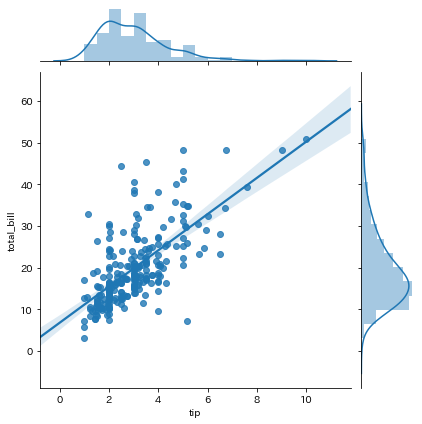

In [71]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='reg')

### 散布行列に回帰グラフを描画する

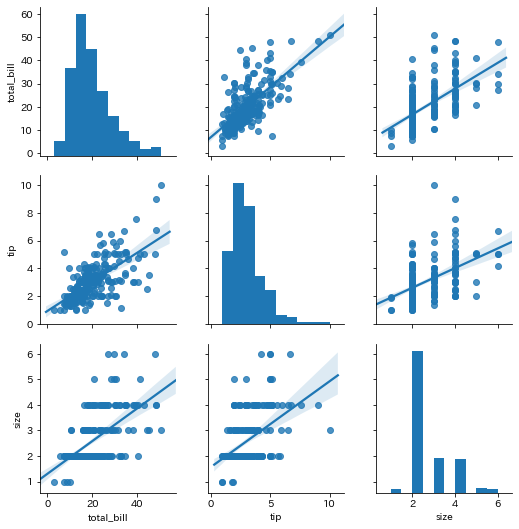

In [72]:
sns.pairplot(data=tips, kind='reg')